In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
listings_df = pd.read_csv('Resources/listingshort.csv')
listings_df.head()

,id,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,3109.0,Rental unit in Paris 5.0 · 1 bedroom · 1 bed ·...,Observatoire,Entire home/apt,150.0,2,4,0.05,327
1,5396.0,Rental unit in Paris · ★4.59 · Studio · 1 bed ...,Hôtel-de-Ville,Entire home/apt,146.0,1,374,2.12,0
2,7397.0,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,Hôtel-de-Ville,Entire home/apt,140.0,10,343,2.22,198
3,7964.0,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,Opéra,Entire home/apt,180.0,7,5,0.03,25
4,9359.0,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,Louvre,Entire home/apt,75.0,180,0,NaN,185


In [3]:
# Drop non-beneficial columns
listings_df.drop(['name'], axis=1, inplace=True)
listings_df

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,3.109000e+03,Observatoire,Entire home/apt,150.0,2,4,0.05,327
1,5.396000e+03,Hôtel-de-Ville,Entire home/apt,146.0,1,374,2.12,0
2,7.397000e+03,Hôtel-de-Ville,Entire home/apt,140.0,10,343,2.22,198
3,7.964000e+03,Opéra,Entire home/apt,180.0,7,5,0.03,25
4,9.359000e+03,Louvre,Entire home/apt,75.0,180,0,NaN,185
...,...,...,...,...,...,...,...,...
74291,1.043630e+18,Ménilmontant,Entire home/apt,52.0,1,0,NaN,100
74292,1.043710e+18,Buttes-Montmartre,Entire home/apt,500.0,1,0,NaN,27
74293,1.043930e+18,Entrepôt,Entire home/apt,324.0,1,0,NaN,362
74294,1.043950e+18,Élysée,Entire home/apt,85.0,1,0,NaN,290


In [4]:
listings_df.drop(['reviews_per_month'], axis=1, inplace=True)
listings_df

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,3.109000e+03,Observatoire,Entire home/apt,150.0,2,4,327
1,5.396000e+03,Hôtel-de-Ville,Entire home/apt,146.0,1,374,0
2,7.397000e+03,Hôtel-de-Ville,Entire home/apt,140.0,10,343,198
3,7.964000e+03,Opéra,Entire home/apt,180.0,7,5,25
4,9.359000e+03,Louvre,Entire home/apt,75.0,180,0,185
...,...,...,...,...,...,...,...
74291,1.043630e+18,Ménilmontant,Entire home/apt,52.0,1,0,100
74292,1.043710e+18,Buttes-Montmartre,Entire home/apt,500.0,1,0,27
74293,1.043930e+18,Entrepôt,Entire home/apt,324.0,1,0,362
74294,1.043950e+18,Élysée,Entire home/apt,85.0,1,0,290


In [5]:
listings_df.drop(['room_type'], axis=1, inplace=True)
listings_df

,id,neighbourhood,price,minimum_nights,number_of_reviews,availability_365
0,3.109000e+03,Observatoire,150.0,2,4,327
1,5.396000e+03,Hôtel-de-Ville,146.0,1,374,0
2,7.397000e+03,Hôtel-de-Ville,140.0,10,343,198
3,7.964000e+03,Opéra,180.0,7,5,25
4,9.359000e+03,Louvre,75.0,180,0,185
...,...,...,...,...,...,...
74291,1.043630e+18,Ménilmontant,52.0,1,0,100
74292,1.043710e+18,Buttes-Montmartre,500.0,1,0,27
74293,1.043930e+18,Entrepôt,324.0,1,0,362
74294,1.043950e+18,Élysée,85.0,1,0,290


In [6]:
# Drop non-beneficial columns
listings_df.drop(['neighbourhood'], axis=1, inplace=True)
listings_df

,id,price,minimum_nights,number_of_reviews,availability_365
0,3.109000e+03,150.0,2,4,327
1,5.396000e+03,146.0,1,374,0
2,7.397000e+03,140.0,10,343,198
3,7.964000e+03,180.0,7,5,25
4,9.359000e+03,75.0,180,0,185
...,...,...,...,...,...
74291,1.043630e+18,52.0,1,0,100
74292,1.043710e+18,500.0,1,0,27
74293,1.043930e+18,324.0,1,0,362
74294,1.043950e+18,85.0,1,0,290


In [7]:
listings_df.dropna()
listings_df

,id,price,minimum_nights,number_of_reviews,availability_365
0,3.109000e+03,150.0,2,4,327
1,5.396000e+03,146.0,1,374,0
2,7.397000e+03,140.0,10,343,198
3,7.964000e+03,180.0,7,5,25
4,9.359000e+03,75.0,180,0,185
...,...,...,...,...,...
74291,1.043630e+18,52.0,1,0,100
74292,1.043710e+18,500.0,1,0,27
74293,1.043930e+18,324.0,1,0,362
74294,1.043950e+18,85.0,1,0,290


In [8]:
app_numeric = pd.get_dummies(listings_df)
app_numeric

,id,price,minimum_nights,number_of_reviews,availability_365
0,3.109000e+03,150.0,2,4,327
1,5.396000e+03,146.0,1,374,0
2,7.397000e+03,140.0,10,343,198
3,7.964000e+03,180.0,7,5,25
4,9.359000e+03,75.0,180,0,185
...,...,...,...,...,...
74291,1.043630e+18,52.0,1,0,100
74292,1.043710e+18,500.0,1,0,27
74293,1.043930e+18,324.0,1,0,362
74294,1.043950e+18,85.0,1,0,290


In [9]:
listings_df.fillna(0)
listings_df

,id,price,minimum_nights,number_of_reviews,availability_365
0,3.109000e+03,150.0,2,4,327
1,5.396000e+03,146.0,1,374,0
2,7.397000e+03,140.0,10,343,198
3,7.964000e+03,180.0,7,5,25
4,9.359000e+03,75.0,180,0,185
...,...,...,...,...,...
74291,1.043630e+18,52.0,1,0,100
74292,1.043710e+18,500.0,1,0,27
74293,1.043930e+18,324.0,1,0,362
74294,1.043950e+18,85.0,1,0,290


In [34]:
# data splitting
y = listings_df["price"]
X = listings_df.drop(["price", "id"],axis=1)

In [35]:
nan_indices = np.isnan(y)

In [36]:
y.fillna(y.mean(), inplace=True)

In [13]:
y.shape

(74296,)

In [14]:
X.shape

(74296, 4)

In [37]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [38]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [39]:
# Train the model using the training sets
regr.fit(X_train,y_train)

C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` 

LinearRegression()

In [40]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [41]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-0.17047303 -0.44611796  0.35297322]
Mean squared error: 178024.39
Coefficient of determination: 0.01


C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Chrissie\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_exten

In [44]:
listings_df.corr().style.background_gradient(cmap='coolwarm')

,id,price,minimum_nights,number_of_reviews,availability_365
id,1.000000,0.055058,-0.363776,-0.259680,0.202302
price,0.055058,1.000000,-0.040892,-0.028525,0.073943
minimum_nights,-0.363776,-0.040892,1.000000,-0.131540,-0.187202
number_of_reviews,-0.259680,-0.028525,-0.131540,1.000000,0.059402
availability_365,0.202302,0.073943,-0.187202,0.059402,1.000000


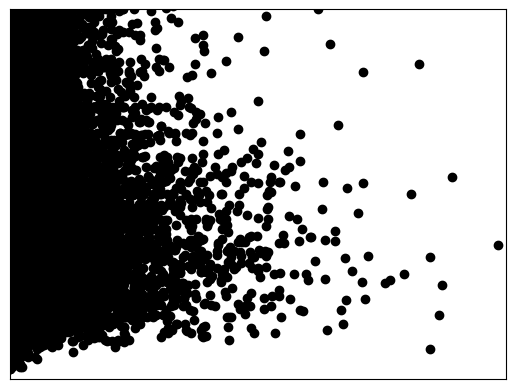

In [47]:
plt.scatter(listings_df['number_of_reviews'],listings_df['price'], color="black")

plt.xticks(())
plt.yticks(())
plt.ylim(0,300)
plt.xlim(0,1000)
plt.show()

In [21]:
if len(X) != len(y):
    print("Sizes of x and y arrays are different.")
else:
    print("Sizes of x and y arrays are the same.")

Sizes of x and y arrays are the same.


In [31]:
np.mean(y_pred)

223.29459229417242

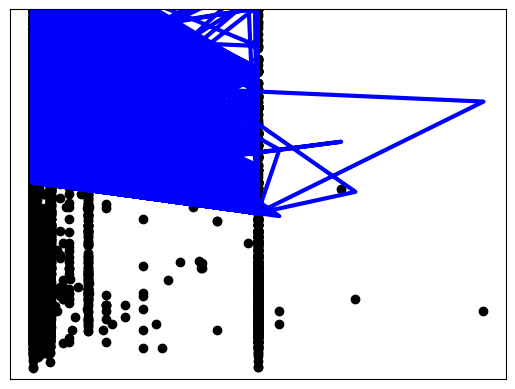

In [28]:
# Plot outputs
plt.scatter(X_test['minimum_nights'],y_test, color="black")
plt.plot(X_test['minimum_nights'],y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.ylim(0,300)
plt.show()

In [ ]:
# Train the model using the training sets
# regr.fit(X_train, y_train)
# Import the LogisticRegression module from SKLearn
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LogisticRegression
# model = LinearRegression()
# model.fit(X, y)
# y_pred = model.predict(X)

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
# lr_model = logistic_regression_model.fit(X_train, y_train)